# <u>LIFE EXPECTANCY PREDICTION USING REGRESSION

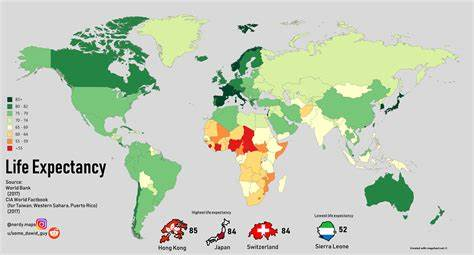

#### Importing necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso


#### Loading the dataset

In [2]:
df = pd.read_csv('./Life_Expectancy_Data.csv')
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

#### Renaming Columns

In [26]:
df.columns=df.columns.str.replace(' ',"")

In [108]:
df.columns=df.columns.str.replace('-','_to_',)

In [109]:
df.isnull().mean()*100

Year                            0.0
Status                          0.0
Lifeexpectancy                  0.0
AdultMortality                  0.0
infantdeaths                    0.0
Alcohol                         0.0
percentageexpenditure           0.0
HepatitisB                      0.0
Measles                         0.0
BMI                             0.0
undertofivedeaths               0.0
Polio                           0.0
Totalexpenditure                0.0
Diphtheria                      0.0
HIV/AIDS                        0.0
GDP                             0.0
Population                      0.0
thinness1to19years              0.0
thinness5to9years               0.0
Incomecompositionofresources    0.0
Schooling                       0.0
dtype: float64

#### Interpolation to fill null values

In [110]:
df.interpolate(axis=0,inplace=True)

#### Label encoding categorical columns

In [111]:
le =LabelEncoder()

In [112]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [113]:
df.head(5)

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1to19years,thinness5to9years,Incomecompositionofresources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [114]:
column = ['BMI','Diphtheria','Incomecompositionofresources', 'Schooling',
       'HIV/AIDS', 'GDP', 'Alcohol','percentageexpenditure','HepatitisB','Totalexpenditure']

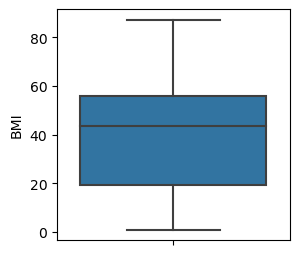

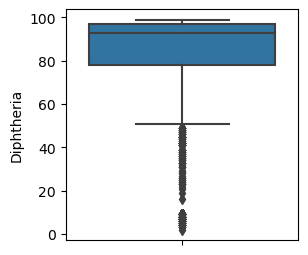

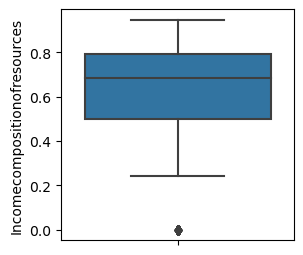

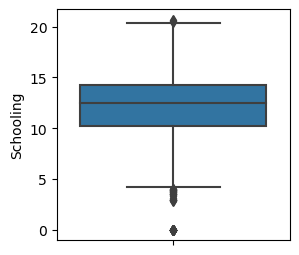

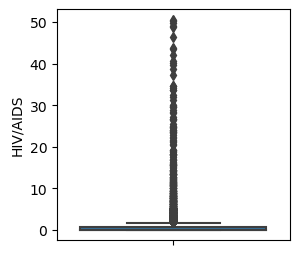

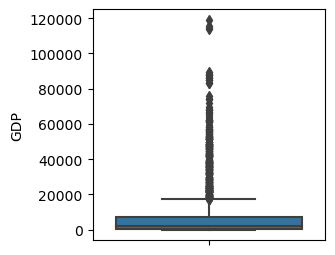

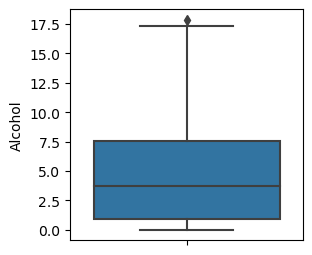

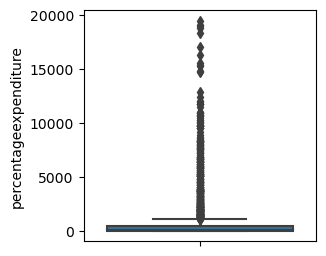

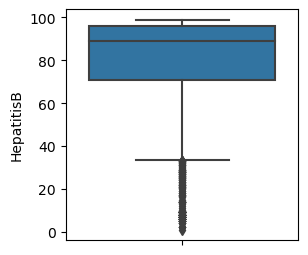

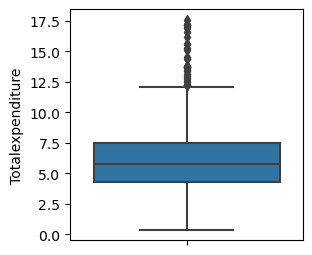

In [115]:
for i in column:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df,y =i)
    plt.show()

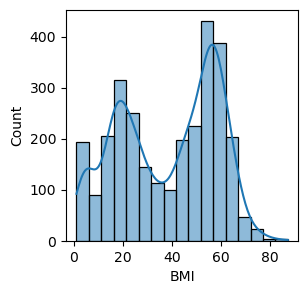

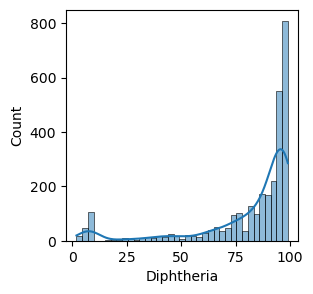

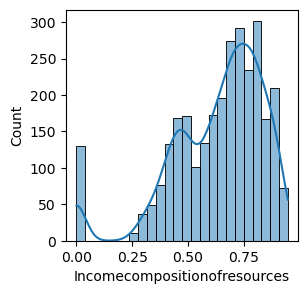

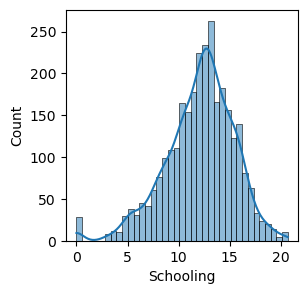

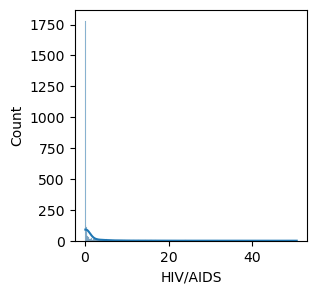

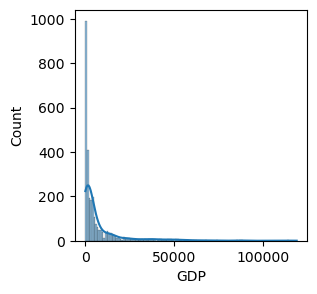

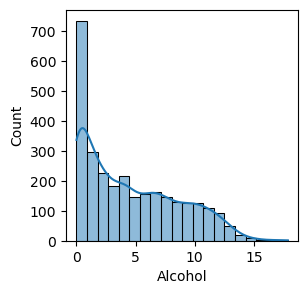

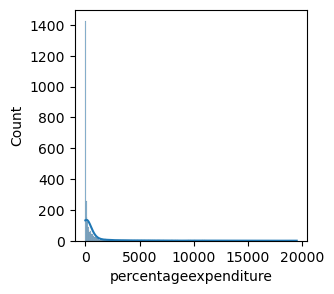

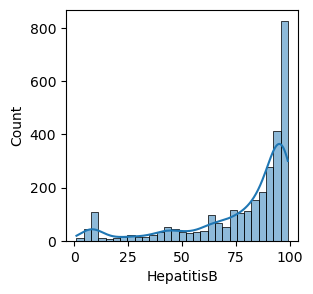

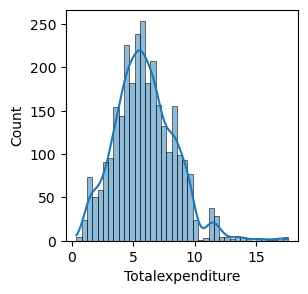

In [116]:
for i in column:
    plt.figure(figsize=(3,3))
    sns.histplot(data=df,x =i,kde =True)
    plt.show()

#### OUTLIER TREATMENT

In [117]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3- Q1
    UL =Q3+ 1.5*IQR
    LL =Q1 -1.5*IQR
    return UL,LL

In [118]:
UL,LL = outlier_limit(df.Lifeexpectancy)
df['Lifeexpectancy'] = np.where((df.Lifeexpectancy>UL)|(df.Lifeexpectancy<LL),np.nan,df.Lifeexpectancy)

In [119]:
df.head(2)

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1to19years,thinness5to9years,Incomecompositionofresources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [120]:
df.isnull().sum()

Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
undertofivedeaths               0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1to19years              0
thinness5to9years               0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [121]:
df.dropna(inplace=True)

In [122]:
df.isnull().sum()

Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
undertofivedeaths               0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1to19years              0
thinness5to9years               0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

#### <u> Correlation map

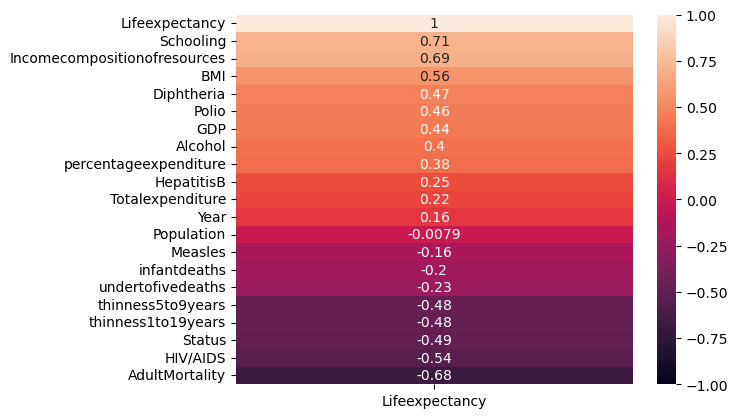

In [123]:
sns.heatmap(df.corr()[['Lifeexpectancy']].sort_values(by ='Lifeexpectancy',ascending= False),\
            vmin =-1,vmax =1,annot =True)
plt.show()

In [124]:
df.columns

Index(['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'undertofivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1to19years',
       'thinness5to9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [125]:
x = df[['BMI','Diphtheria','Incomecompositionofresources', 'Schooling',
       'HIV/AIDS', 'GDP', 'Alcohol','percentageexpenditure','HepatitisB','Totalexpenditure']].values

In [126]:
y = df[['Lifeexpectancy']].values

In [127]:
sc= StandardScaler()

In [128]:
x =sc.fit_transform(x)

In [129]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.2, \
                                                shuffle=True, random_state=42)

#### <u> Feature Selection

In [130]:
fs = SelectKBest(score_func= f_regression , k = 'all')

In [131]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x00000279FC7790D0>)

In [132]:
for i in range(len(fs.scores_)):
    print(f'feature is {i} and score is {fs.scores_[i]}')

feature is 0 and score is 1055.4334370443194
feature is 1 and score is 669.7427902512812
feature is 2 and score is 2071.190363411089
feature is 3 and score is 2186.6751772744387
feature is 4 and score is 965.9622981807898
feature is 5 and score is 565.554059516081
feature is 6 and score is 443.5999109329264
feature is 7 and score is 413.66392710610603
feature is 8 and score is 160.3888291942827
feature is 9 and score is 131.767276531163


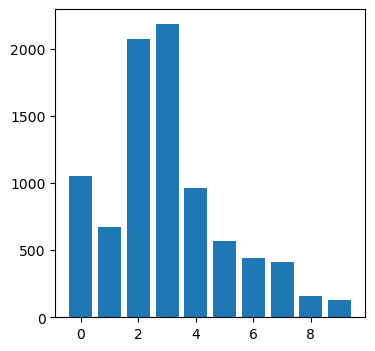

In [147]:
plt.figure(figsize= (4,4))
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

In [148]:
fs = SelectKBest(score_func= f_regression , k = 9)

In [149]:
fs.fit(x_train,y_train)

SelectKBest(k=9, score_func=<function f_regression at 0x00000279FC7790D0>)

In [150]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [151]:
x_test_fs.shape

(587, 9)

In [152]:
lr =Ridge()

In [153]:
lr.fit(x_train,y_train)

Ridge()

In [154]:
lr.score(x_train,y_train)

0.7422083709080958

In [155]:
lr.score(x_train,y_train)

0.7422083709080958

In [156]:
lr.score(x_test,y_test)

0.7872334019102074

In [157]:
y_pred = lr.predict(x_test)

In [158]:
output =pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'],dtype=float)

In [159]:
output

,Actual,Prediction
0,64.7,72.096728
1,67.6,67.346230
2,75.1,69.186772
3,72.5,74.893888
4,80.0,86.476078
...,...,...
582,72.3,69.258855
583,73.0,61.788821
584,74.8,73.873911
585,49.3,46.065960


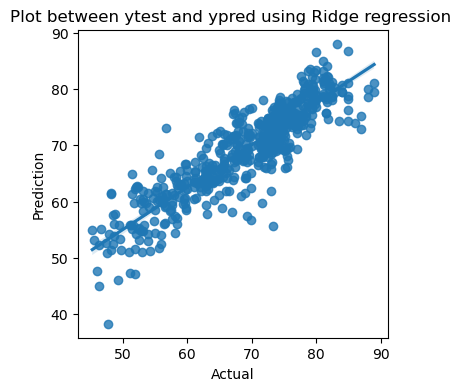

In [163]:
plt.figure(figsize=(4,4))
sns.regplot(data=output, x='Actual', y='Prediction')
plt.title('Plot between ytest and ypred using Ridge regression ')
plt.show()